## Análisis de datos - Clase 6

# Taller práctico - análisis de un dataset

En esta clase vamos a analizar en forma completa un dataset con datos de Fórmula 1 de la temporada 2024 (los datos fueron extraídos con la biblioteca Fastf1). El dataset contiene información sobre las carreras, los pilotos, los tiempos y los resultados de cada evento.


In [908]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [909]:
# Dataset de carreras del 2024
carreras_24 = pd.read_parquet('../datasets/carreras_24_after_eda.parquet', engine='pyarrow')

In [910]:
carreras_24.shape

(26606, 32)

In [911]:
carreras_24.columns

Index(['EventName', 'EventDate', 'Driver', 'DriverNumber', 'Team', 'PitInTime',
       'PitOutTime', 'IsPersonalBest', 'Stint', 'LapTime', 'LapNumber',
       'LapStartTime', 'LapStartDate', 'Sector1Time', 'Sector2Time',
       'Sector3Time', 'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'AirTemp',
       'TrackTemp', 'Humidity', 'Compound', 'TyreLife', 'FreshTyre',
       'TrackStatus', 'Position', 'Deleted', 'DeletedReason',
       'FastF1Generated', 'IsAccurate'],
      dtype='object')

In [912]:
carreras_24.head(10)

,EventName,EventDate,Driver,DriverNumber,Team,PitInTime,PitOutTime,IsPersonalBest,Stint,LapTime,...,Humidity,Compound,TyreLife,FreshTyre,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,Bahrain Grand Prix,2024-03-02,VER,1,Red Bull Racing,NaT,NaT,False,1.0,97.284,...,49.0,SOFT,4.0,False,12,1.0,False,NaN,False,False
1,Bahrain Grand Prix,2024-03-02,LEC,16,Ferrari,NaT,NaT,False,1.0,98.271,...,49.0,SOFT,4.0,False,12,2.0,False,NaN,False,False
2,Bahrain Grand Prix,2024-03-02,RUS,63,Mercedes,NaT,NaT,False,1.0,99.228,...,49.0,SOFT,4.0,False,12,3.0,False,NaN,False,False
3,Bahrain Grand Prix,2024-03-02,NOR,4,McLaren,NaT,NaT,False,1.0,102.168,...,49.0,SOFT,4.0,False,12,7.0,False,NaN,False,False
4,Bahrain Grand Prix,2024-03-02,HAM,44,Mercedes,NaT,NaT,False,1.0,103.122,...,49.0,SOFT,4.0,False,12,9.0,False,NaN,False,False
5,Bahrain Grand Prix,2024-03-02,PIA,81,McLaren,NaT,NaT,False,1.0,102.523,...,49.0,SOFT,4.0,False,12,8.0,False,NaN,False,False
6,Bahrain Grand Prix,2024-03-02,ALO,14,Aston Martin,NaT,NaT,False,1.0,101.679,...,49.0,SOFT,4.0,False,12,6.0,False,NaN,False,False
7,Bahrain Grand Prix,2024-03-02,SAR,2,Williams,NaT,NaT,False,1.0,105.921,...,49.0,SOFT,1.0,True,12,15.0,False,NaN,False,False
8,Bahrain Grand Prix,2024-03-02,SAI,55,Ferrari,NaT,NaT,False,1.0,100.620,...,49.0,SOFT,4.0,False,12,5.0,False,NaN,False,False
9,Bahrain Grand Prix,2024-03-02,ZHO,24,Kick Sauber,NaT,NaT,False,1.0,104.801,...,49.0,SOFT,1.0,True,12,13.0,False,NaN,False,False


In [913]:
carreras_24.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26606 entries, 0 to 26605
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype          
---  ------           --------------  -----          
 0   EventName        26606 non-null  category       
 1   EventDate        26606 non-null  datetime64[ns] 
 2   Driver           26606 non-null  category       
 3   DriverNumber     26606 non-null  int64          
 4   Team             26606 non-null  category       
 5   PitInTime        849 non-null    timedelta64[ns]
 6   PitOutTime       840 non-null    timedelta64[ns]
 7   IsPersonalBest   26591 non-null  object         
 8   Stint            26606 non-null  float64        
 9   LapTime          26381 non-null  float64        
 10  LapNumber        26606 non-null  int64          
 11  LapStartTime     26606 non-null  float64        
 12  LapStartDate     26591 non-null  datetime64[ns] 
 13  Sector1Time      26066 non-null  float64        
 14  Sector2Time      26574

In [914]:
carreras_24.select_dtypes(include='bool').columns

Index(['FreshTyre', 'Deleted', 'FastF1Generated', 'IsAccurate'], dtype='object')

In [915]:
carreras_24.select_dtypes(include='object').columns

Index(['IsPersonalBest'], dtype='object')

In [916]:
# Convierto las booleanas
carreras_24['FreshTyre'] = carreras_24['FreshTyre'].astype('category')
carreras_24['IsPersonalBest'] = carreras_24['IsPersonalBest'].astype('category')
carreras_24['Deleted'] = carreras_24['Deleted'].astype('category')
carreras_24['TrackStatus'] = carreras_24['TrackStatus'].astype('category')
carreras_24['FastF1Generated'] = carreras_24['FastF1Generated'].astype('category')
carreras_24['IsAccurate'] = carreras_24['IsAccurate'].astype('category')


In [917]:
carreras_24.describe(include='category')

,EventName,Driver,Team,IsPersonalBest,Compound,FreshTyre,TrackStatus,Deleted,DeletedReason,FastF1Generated,IsAccurate
count,26606,26606,26606,26591,26606,26606,26606,26606,326,26606,26606
unique,24,24,10,2,6,2,25,2,255,2,2
top,Dutch Grand Prix,PIA,McLaren,False,HARD,True,1,False,TRACK LIMITS AT TURN 1 LAP 10,False,True
freq,1426,1444,2881,21094,13767,21042,24604,26280,5,26578,23557


---
## Datos faltantes

#### Total de datos faltantes

In [918]:
# Serie con los valores faltantes
faltantes = carreras_24.isna().sum()

# Calculamos porcentaje de valores faltantes
total_filas = len(carreras_24)
faltantes_df = faltantes.to_frame(name='faltantes')
faltantes_df['porcentaje'] = ((faltantes_df['faltantes'] / total_filas) * 100).round(2)
faltantes_df = faltantes_df.sort_values(by='faltantes', ascending=False)

# Mostramos solo las que tienen valores faltantes
faltantes_df[faltantes_df['faltantes'] > 0]

,faltantes,porcentaje
DeletedReason,26280,98.77
PitOutTime,25766,96.84
PitInTime,25757,96.81
SpeedI1,4146,15.58
SpeedST,2184,8.21
SpeedFL,878,3.30
Sector1Time,540,2.03
LapTime,225,0.85
SpeedI2,54,0.20
Sector3Time,53,0.20


#### Nulos en DeletedReason

In [919]:
print(f"Total de filas del dataset: {carreras_24.shape[0]}")
print(f"Cantidad de filas donde Deleted=True y DeletedReason=NaN: {carreras_24[(carreras_24['Deleted']==True) & carreras_24['DeletedReason'].isna()].shape[0]}")
print(f"Cantidad de filas donde Deleted=False y DeletedReason=Not NaN: {carreras_24[(carreras_24['Deleted']==False) & carreras_24['DeletedReason'].notna()].shape[0]}")
print(f"Cantidad de filas donde Deleted=True y DeletedReason=Not NaN: {carreras_24[(carreras_24['Deleted']==True) & carreras_24['DeletedReason'].notna()].shape[0]}")
print(f"Cantidad de filas donde Deleted=False y DeletedReason=NaN: {carreras_24[(carreras_24['Deleted']==False) & carreras_24['DeletedReason'].isna()].shape[0]}")

Total de filas del dataset: 26606
Cantidad de filas donde Deleted=True y DeletedReason=NaN: 0
Cantidad de filas donde Deleted=False y DeletedReason=Not NaN: 0
Cantidad de filas donde Deleted=True y DeletedReason=Not NaN: 326
Cantidad de filas donde Deleted=False y DeletedReason=NaN: 26280


Conclusión: DeletedReason es no nula únicamente cuando Deleted = True (cuando le anularon la vuelta al corredor por alguna infracción). Entonces no son realmente datos faltantes, sino datos que no se registran cuando la vuelta es válida.

In [920]:
carreras_24['DeletedReason'].dtype



CategoricalDtype(categories=['TRACK LIMITS AT PIT ENTRY LAP 23 ',
                  'TRACK LIMITS AT PIT ENTRY LAP 6 ',
                  'TRACK LIMITS AT TURN 1 LAP 10 ',
                  'TRACK LIMITS AT TURN 1 LAP 13 ',
                  'TRACK LIMITS AT TURN 1 LAP 14 ',
                  'TRACK LIMITS AT TURN 1 LAP 15 ',
                  'TRACK LIMITS AT TURN 1 LAP 16 ',
                  'TRACK LIMITS AT TURN 1 LAP 21 ',
                  'TRACK LIMITS AT TURN 1 LAP 24 ',
                  'TRACK LIMITS AT TURN 1 LAP 28 ',
                  ...
                  'TRACK LIMITS AT TURN 9 LAP 22 ',
                  'TRACK LIMITS AT TURN 9 LAP 26 ',
                  'TRACK LIMITS AT TURN 9 LAP 31 ',
                  'TRACK LIMITS AT TURN 9 LAP 40 ',
                  'TRACK LIMITS AT TURN 9 LAP 41 ',
                  'TRACK LIMITS AT TURN 9 LAP 46 ',
                  'TRACK LIMITS AT TURN 9 LAP 52 ',
                  'TRACK LIMITS AT TURN 9 LAP 6 ',
                  'TRACK LI

In [921]:
carreras_24['DeletedReason'] = carreras_24['DeletedReason'].cat.add_categories(['NotDeleted'])
carreras_24['DeletedReason'] = carreras_24['DeletedReason'].fillna('NotDeleted')


In [922]:
carreras_24.describe(include='category')

,EventName,Driver,Team,IsPersonalBest,Compound,FreshTyre,TrackStatus,Deleted,DeletedReason,FastF1Generated,IsAccurate
count,26606,26606,26606,26591,26606,26606,26606,26606,26606,26606,26606
unique,24,24,10,2,6,2,25,2,256,2,2
top,Dutch Grand Prix,PIA,McLaren,False,HARD,True,1,False,NotDeleted,False,True
freq,1426,1444,2881,21094,13767,21042,24604,26280,26280,26578,23557


#### Análisis de nulos de PitInTime y PitOutTime 

Hasta el 2024, los pilotos estaban obligados a hacer al menos 1 parada en boxes por carrera (cambió a 2 en 2025). 

Los datos de PitInTime y PitOutTime son nulos para las vueltas que no tienen parada en boxes. Esto es esperable por diseño (no son realmente faltantes)

¿Qué hacemos en este caso?
- Opción 1: reemplazar con 0s los nulos. Problema: son columnas que indican tiempos!
- Opción 2: crear 2 nuevas columnas: Boxes (True/False) y PitTime (PitInTime - PitOutTime). PitTime tendrá valores 0 para aquellas vueltas que no tienen parada en boxes. 

In [923]:
# Cantidad de filas que no tienen nulos
PitInTime_no_nulos = total_filas-faltantes['PitInTime']
PitOutTime_no_nulos = total_filas-faltantes['PitOutTime']

print(f'Cantidad de entradas a boxes: {PitInTime_no_nulos}, cantidad de salidas de boxes: {PitOutTime_no_nulos}')

Cantidad de entradas a boxes: 849, cantidad de salidas de boxes: 840


In [924]:
carreras_24[(carreras_24['PitInTime'].notnull()) & (carreras_24['PitOutTime'].notnull())]

,EventName,EventDate,Driver,DriverNumber,Team,PitInTime,PitOutTime,IsPersonalBest,Stint,LapTime,...,Humidity,Compound,TyreLife,FreshTyre,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
3245,Japanese Grand Prix,2024-04-07,ZHO,24,Kick Sauber,0 days 01:52:08.494000,0 days 01:50:27.076000,False,4.0,128.193,...,40.0,HARD,5.0,False,1,18.0,False,NotDeleted,False,False
6252,Emilia Romagna Grand Prix,2024-05-19,ALB,23,Williams,0 days 01:09:28.708000,0 days 01:07:15.914000,False,2.0,NaN,...,51.0,HARD,1.0,True,1,20.0,False,NotDeleted,False,False
23058,São Paulo Grand Prix,2024-11-03,ZHO,24,Kick Sauber,0 days 01:53:35.972000,0 days 01:51:55.386000,False,2.0,126.376,...,86.0,INTERMEDIATE,1.0,True,671,17.0,False,NotDeleted,False,False
23119,São Paulo Grand Prix,2024-11-03,HUL,27,Haas F1 Team,0 days 02:01:05.310000,0 days 01:58:44.080000,False,4.0,NaN,...,89.0,INTERMEDIATE,1.0,True,45,18.0,False,NotDeleted,False,False
23127,São Paulo Grand Prix,2024-11-03,ZHO,24,Kick Sauber,0 days 02:23:53.295000,0 days 02:22:03.366000,False,4.0,NaN,...,90.0,INTERMEDIATE,1.0,True,51,16.0,False,NotDeleted,False,False
23915,Las Vegas Grand Prix,2024-11-23,OCO,31,Alpine,0 days 01:16:55.566000,0 days 01:15:16.298000,False,2.0,114.887,...,51.0,MEDIUM,12.0,False,1,15.0,False,NotDeleted,False,False
24773,Qatar Grand Prix,2024-12-01,STR,18,Aston Martin,0 days 01:10:57.663000,0 days 01:09:18.818000,False,3.0,140.862,...,54.0,HARD,1.0,True,1,18.0,False,NotDeleted,False,False
25230,Qatar Grand Prix,2024-12-01,HAM,44,Mercedes,0 days 01:50:51.672000,0 days 01:48:31.837000,False,2.0,NaN,...,57.0,HARD,1.0,False,4,16.0,False,NotDeleted,False,False
25231,Qatar Grand Prix,2024-12-01,VER,1,Red Bull Racing,0 days 01:50:50.228000,0 days 01:48:29.321000,False,2.0,NaN,...,57.0,HARD,1.0,True,4,1.0,False,NotDeleted,False,False
25232,Qatar Grand Prix,2024-12-01,NOR,4,McLaren,0 days 01:50:54.535000,0 days 01:48:33.018000,False,2.0,NaN,...,57.0,HARD,1.0,True,4,2.0,False,NotDeleted,False,False


#### Ejemplo de salida a boxes

In [925]:
carreras_24[carreras_24['Driver']=='ALB'][['LapNumber','PitOutTime','PitInTime', 'EventName']].head(30)

,LapNumber,PitOutTime,PitInTime,EventName
12,1,NaT,NaT,Bahrain Grand Prix
30,2,NaT,NaT,Bahrain Grand Prix
50,3,NaT,NaT,Bahrain Grand Prix
70,4,NaT,NaT,Bahrain Grand Prix
90,5,NaT,NaT,Bahrain Grand Prix
110,6,NaT,NaT,Bahrain Grand Prix
130,7,NaT,NaT,Bahrain Grand Prix
150,8,NaT,NaT,Bahrain Grand Prix
170,9,NaT,NaT,Bahrain Grand Prix
190,10,NaT,NaT,Bahrain Grand Prix


Creamos nueva variable 'PitTime_seconds' que guarda el tiempo de parada en boxes

In [926]:
carreras_24 = carreras_24.sort_values(by=['EventName', 'Driver', 'LapNumber'])

# PitIn-Out
carreras_24['PitOutTime2'] = carreras_24.groupby(['EventName', 'Driver'], observed=True)['PitOutTime'].shift(-1)
carreras_24['PitTime'] = carreras_24['PitOutTime2'] - carreras_24['PitInTime']
carreras_24['PitTime_seconds'] = carreras_24['PitTime'].dt.total_seconds()

carreras_24.head()

,EventName,EventDate,Driver,DriverNumber,Team,PitInTime,PitOutTime,IsPersonalBest,Stint,LapTime,...,FreshTyre,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate,PitOutTime2,PitTime,PitTime_seconds
25580,Abu Dhabi Grand Prix,2024-12-08,ALB,23,Williams,NaT,NaT,False,1.0,101.190,...,True,12,16.0,False,NotDeleted,False,False,NaT,NaT,NaN
25605,Abu Dhabi Grand Prix,2024-12-08,ALB,23,Williams,NaT,NaT,True,1.0,120.191,...,True,26,15.0,False,NotDeleted,False,False,NaT,NaT,NaN
25624,Abu Dhabi Grand Prix,2024-12-08,ALB,23,Williams,NaT,NaT,True,1.0,95.776,...,True,671,15.0,False,NotDeleted,False,False,NaT,NaT,NaN
25643,Abu Dhabi Grand Prix,2024-12-08,ALB,23,Williams,NaT,NaT,True,1.0,90.060,...,True,1,15.0,False,NotDeleted,False,True,NaT,NaT,NaN
25662,Abu Dhabi Grand Prix,2024-12-08,ALB,23,Williams,NaT,NaT,False,1.0,90.369,...,True,1,15.0,False,NotDeleted,False,True,NaT,NaT,NaN


In [927]:
# Verifico que la nueva columna PitTime no tenga valores nulos
carreras_24[(carreras_24['PitTime_seconds'].notnull())].shape

(824, 35)

Aplico imputación con 0s a los NaN de 'PitTime_seconds' y creo una nueva variable binaria 'Pit' que indica si el piloto hizo una parada en boxes o no. 

In [928]:
# Creo nueva variable binaria
carreras_24['Pit'] = np.where(carreras_24['PitTime_seconds'].isnull(), 0, 1)

# Verifico que para no nulos en PitTime haya un 1 en Pit
carreras_24[(carreras_24['PitTime_seconds'].notnull())].head()


,EventName,EventDate,Driver,DriverNumber,Team,PitInTime,PitOutTime,IsPersonalBest,Stint,LapTime,...,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate,PitOutTime2,PitTime,PitTime_seconds,Pit
25794,Abu Dhabi Grand Prix,2024-12-08,ALB,23,Williams,0 days 01:15:40.720000,NaT,False,1.0,92.201,...,1,14.0,False,NotDeleted,False,False,0 days 01:16:02.774000,0 days 00:00:22.054000,22.054,1
25807,Abu Dhabi Grand Prix,2024-12-08,ALO,14,Aston Martin,0 days 01:17:02.713000,NaT,False,1.0,93.244,...,1,8.0,False,NotDeleted,False,False,0 days 01:17:26.460000,0 days 00:00:23.747000,23.747,1
26248,Abu Dhabi Grand Prix,2024-12-08,ALO,14,Aston Martin,0 days 01:53:23.943000,NaT,False,2.0,91.999,...,1,9.0,False,NotDeleted,False,False,0 days 01:53:46.293000,0 days 00:00:22.350000,22.350,1
25679,Abu Dhabi Grand Prix,2024-12-08,BOT,77,Kick Sauber,0 days 01:06:36.737000,NaT,False,1.0,93.388,...,1,16.0,False,NotDeleted,False,False,0 days 01:07:17.835000,0 days 00:00:41.098000,41.098,1
25627,Abu Dhabi Grand Prix,2024-12-08,COL,43,Williams,0 days 01:02:42.334000,NaT,False,1.0,130.710,...,671,19.0,False,NotDeleted,False,False,0 days 01:03:07.286000,0 days 00:00:24.952000,24.952,1


In [929]:
# Verifico que para nulos en PitTime haya un 0 en Pit
carreras_24[(carreras_24['PitTime_seconds'].isnull())].head()


,EventName,EventDate,Driver,DriverNumber,Team,PitInTime,PitOutTime,IsPersonalBest,Stint,LapTime,...,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate,PitOutTime2,PitTime,PitTime_seconds,Pit
25580,Abu Dhabi Grand Prix,2024-12-08,ALB,23,Williams,NaT,NaT,False,1.0,101.190,...,12,16.0,False,NotDeleted,False,False,NaT,NaT,NaN,0
25605,Abu Dhabi Grand Prix,2024-12-08,ALB,23,Williams,NaT,NaT,True,1.0,120.191,...,26,15.0,False,NotDeleted,False,False,NaT,NaT,NaN,0
25624,Abu Dhabi Grand Prix,2024-12-08,ALB,23,Williams,NaT,NaT,True,1.0,95.776,...,671,15.0,False,NotDeleted,False,False,NaT,NaT,NaN,0
25643,Abu Dhabi Grand Prix,2024-12-08,ALB,23,Williams,NaT,NaT,True,1.0,90.060,...,1,15.0,False,NotDeleted,False,True,NaT,NaT,NaN,0
25662,Abu Dhabi Grand Prix,2024-12-08,ALB,23,Williams,NaT,NaT,False,1.0,90.369,...,1,15.0,False,NotDeleted,False,True,NaT,NaT,NaN,0


In [930]:
# Verifico que para nulos en PitTime haya un 0 en Pit
no_pit = len(carreras_24[(carreras_24['Pit']==0)])
is_pit = len(carreras_24[(carreras_24['Pit']==1)])
print(f"Cantidad de filas con Pit=0: {no_pit}")
print(f"Cantidad de filas con Pit=1: {is_pit}")
print(f"Total:{no_pit+is_pit}")

Cantidad de filas con Pit=0: 25782
Cantidad de filas con Pit=1: 824
Total:26606


In [931]:
# Aplico imputación a los valores nulos 
carreras_24['PitTime_seconds'] = pd.to_numeric(carreras_24['PitTime_seconds'], errors='coerce').fillna(0)

# Verifico
carreras_24[(carreras_24['PitTime_seconds'].isnull())].shape


(0, 36)

---
## Outliers

Estudio de outliers en PitTime_seconds.

In [932]:
carreras_24[carreras_24['Pit']==1]['PitTime_seconds'].describe(percentiles=[.9, .95, .99])

count     824.000000
mean      131.575460
std       431.692334
min        15.747000
50%        23.536500
90%        34.710000
95%      1420.269050
99%      2376.832380
max      2393.833000
Name: PitTime_seconds, dtype: float64

#### Solo el 1% tiene valores no esperados (muy altos!)

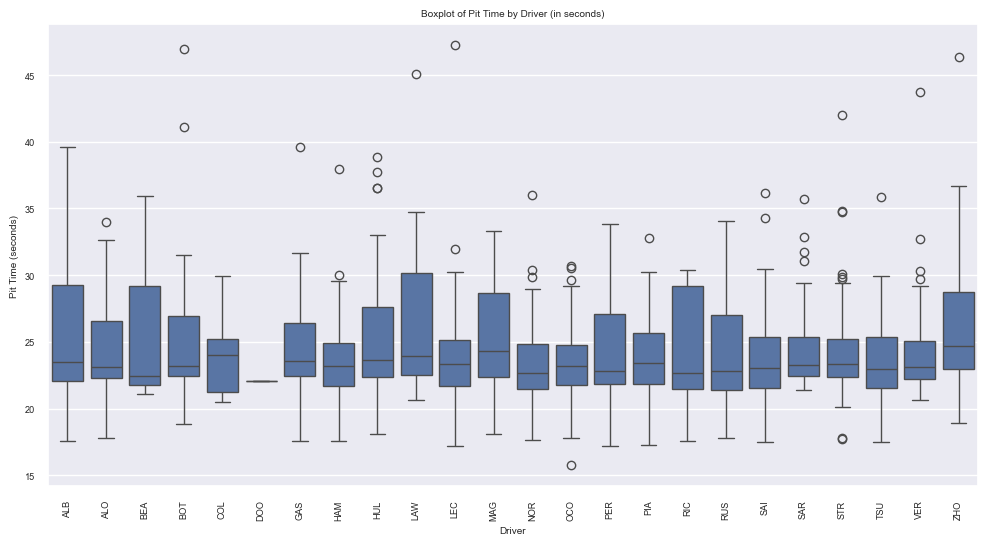

In [933]:
carreras_24_f = carreras_24[(carreras_24['Pit']==1) & (carreras_24['PitTime_seconds'] < 50)]
carreras_24_f['PitTime_seconds'].describe()

# Boxplot por Driver
plt.figure(figsize=(12, 6))
sns.boxplot(x='Driver', y='PitTime_seconds', data=carreras_24_f)
plt.title('Boxplot of Pit Time by Driver (in seconds)')
plt.xlabel('Driver')
plt.ylabel('Pit Time (seconds)')
plt.xticks(rotation=90)
plt.show()

#### ¿Podemos asumir que son legítimos?

In [934]:
# outliers
df = carreras_24
df[df['PitTime_seconds'] >= 100][['EventName', 'Driver', 'LapNumber','PitInTime', 'PitOutTime2', 'PitTime_seconds', 'LapTime']]

,EventName,Driver,LapNumber,PitInTime,PitOutTime2,PitTime_seconds,LapTime
3031,Japanese Grand Prix,ALO,1,0 days 01:04:59.334000,0 days 01:31:20.261000,1580.927,140.526
3040,Japanese Grand Prix,BOT,1,0 days 01:05:22.020000,0 days 01:31:44.274000,1582.254,164.736
3042,Japanese Grand Prix,GAS,1,0 days 01:05:29.811000,0 days 01:31:56.442000,1586.631,173.223
3034,Japanese Grand Prix,HAM,1,0 days 01:05:11.331000,0 days 01:31:32.133000,1580.802,152.716
3045,Japanese Grand Prix,HUL,1,0 days 01:05:20.087000,0 days 01:31:40.905000,1580.818,162.853
3029,Japanese Grand Prix,LEC,1,0 days 01:05:12.799000,0 days 01:31:36.027000,1583.228,154.543
3039,Japanese Grand Prix,MAG,1,0 days 01:05:39.276000,0 days 01:32:03.600000,1584.324,185.172
3030,Japanese Grand Prix,NOR,1,0 days 01:04:53.865000,0 days 01:31:13.972000,1580.107,134.751
3041,Japanese Grand Prix,OCO,1,0 days 01:05:27.302000,0 days 01:31:53.245000,1585.943,170.167
3046,Japanese Grand Prix,PER,1,0 days 01:04:51.966000,0 days 01:31:09.531000,1577.565,132.767


#### Análisis de nulos de LapTime

 Teniendo en cuenta que LapTime es la suma de los tramos Sector1Time, Sector2Time y Sector3Time, hay registros sin datos en absoluto?

In [935]:
# Miro los tiempos. Hay información?
todo_nulo = carreras_24[['LapTime', 'Sector1Time', 'Sector2Time', 'Sector3Time']].isna().all(axis=1)
print(f"Cantidad de filas con los 4 campos nulos: {todo_nulo.sum()}")
carreras_24[todo_nulo]

Cantidad de filas con los 4 campos nulos: 29


,EventName,EventDate,Driver,DriverNumber,Team,PitInTime,PitOutTime,IsPersonalBest,Stint,LapTime,...,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate,PitOutTime2,PitTime,PitTime_seconds,Pit
26585,Abu Dhabi Grand Prix,2024-12-08,LAW,30,RB,NaT,NaT,NaN,4.0,NaN,...,12,NaN,False,NotDeleted,True,False,NaT,NaT,0.0,0
25586,Abu Dhabi Grand Prix,2024-12-08,PER,11,Red Bull Racing,NaT,NaT,False,1.0,NaN,...,12,NaN,False,NotDeleted,True,False,NaT,NaT,0.0,0
2314,Australian Grand Prix,2024-03-24,HAM,44,Mercedes,NaT,NaT,NaN,2.0,NaN,...,12,NaN,False,NotDeleted,True,False,NaT,NaT,0.0,0
3008,Australian Grand Prix,2024-03-24,RUS,63,Mercedes,NaT,NaT,NaN,3.0,NaN,...,1,NaN,False,NotDeleted,True,False,NaT,NaT,0.0,0
19073,Azerbaijan Grand Prix,2024-09-15,PER,11,Red Bull Racing,NaT,NaT,NaN,2.0,NaN,...,1,NaN,False,NotDeleted,True,False,NaT,NaT,0.0,0
19074,Azerbaijan Grand Prix,2024-09-15,SAI,55,Ferrari,NaT,NaT,NaN,2.0,NaN,...,1,NaN,False,NotDeleted,True,False,NaT,NaT,0.0,0
12559,British Grand Prix,2024-07-07,GAS,10,Alpine,NaT,NaT,False,1.0,NaN,...,1,NaN,False,NotDeleted,True,False,NaT,NaT,0.0,0
9563,Canadian Grand Prix,2024-06-09,ALB,23,Williams,NaT,NaT,NaN,3.0,NaN,...,12,NaN,False,NotDeleted,True,False,NaT,NaT,0.0,0
9033,Canadian Grand Prix,2024-06-09,SAR,2,Williams,NaT,NaT,NaN,1.0,NaN,...,1,NaN,False,NotDeleted,True,False,NaT,NaT,0.0,0
4325,Chinese Grand Prix,2024-04-21,BOT,77,Kick Sauber,NaT,NaT,NaN,2.0,NaN,...,12,NaN,False,NotDeleted,True,False,NaT,NaT,0.0,0


#### Entonces:

- Qué tipo de error es este?
- Vale la pena imputar todos estos datos? O es mejor descartar estas 29 filas?


In [936]:
carreras_24.shape # antes

(26606, 36)

In [937]:
# Decidimos descartarlos:
todo_nulo = carreras_24[['LapTime', 'Sector1Time', 'Sector2Time', 'Sector3Time']].isna().all(axis=1)
carreras_24 = carreras_24[~todo_nulo]
carreras_24.shape # despues

(26577, 36)

Si todavía hay nulos, analizamos en detalle: 
¿Es MCAR, MAR o MNAR? ¿Hay patrones?

Cosas que podríamos mirar:
1) ¿La vuelta fue eliminada y por eso falta el LapTime?
2) ¿El piloto hizo una parada en boxes y por eso falta el LapTime?
3) ¿El piloto abandonó por falla técnica, choque, etc.?
4) ¿Hubo algún incidente?

In [938]:
missing_laptime = carreras_24[carreras_24['LapTime'].isna()]

missing_laptime[['Driver','EventName','LapTime','LapNumber', 'Sector1Time','Sector2Time','Sector3Time', 'Pit', 'Deleted', 'Position', 'TrackStatus']]

,Driver,EventName,LapTime,LapNumber,Sector1Time,Sector2Time,Sector3Time,Pit,Deleted,Position,TrackStatus
2088,VER,Australian Grand Prix,NaN,4,28.756,18.353,NaN,0,False,19.0,1
19096,ALB,Azerbaijan Grand Prix,NaN,51,65.644,50.778,36.258,0,False,7.0,6
19095,ALO,Azerbaijan Grand Prix,NaN,51,65.674,51.447,35.155,0,False,6.0,6
19099,BEA,Azerbaijan Grand Prix,NaN,51,67.759,47.594,37.896,0,False,10.0,6
19091,BOT,Azerbaijan Grand Prix,NaN,50,61.927,53.881,36.543,0,False,16.0,6
...,...,...,...,...,...,...,...,...,...,...,...
20370,STR,United States Grand Prix,NaN,5,35.565,61.334,55.141,0,False,12.0,41
20347,TSU,United States Grand Prix,NaN,4,36.915,57.693,55.655,0,False,8.0,4
20366,TSU,United States Grand Prix,NaN,5,35.010,62.524,58.983,0,False,8.0,41
20341,VER,United States Grand Prix,NaN,4,40.222,58.115,53.159,0,False,2.0,4


In [939]:
carreras_24['Deleted'].unique()
# Hay nulos porque la vuelta fue anulada? Deleted = 1

[False, True]
Categories (2, bool): [False, True]

In [940]:
carreras_24[(carreras_24['Deleted']== True) & (carreras_24['LapTime'].isnull())]

,EventName,EventDate,Driver,DriverNumber,Team,PitInTime,PitOutTime,IsPersonalBest,Stint,LapTime,...,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate,PitOutTime2,PitTime,PitTime_seconds,Pit


In [941]:
# ¿Cuántos coinciden con NaN en la columna Position?
print(f"Cuántos coinciden con NaN en Position?: {missing_laptime[missing_laptime['Position'].isnull()].shape[0]}")

# ¿Cuántos de esos datos faltantes son por safety car o virtual safety car?
print(f"Cuántos coinciden con un virtual safety car o safety car?: {missing_laptime[(missing_laptime['TrackStatus'] == 6) | (missing_laptime['TrackStatus'] == 4)].shape[0]}")

# ¿Cuántos de esos datos faltantes coinciden con bandera roja?
print(f"Cuántos coinciden con bandera roja?: {missing_laptime[ (missing_laptime['TrackStatus'] == 5)].shape[0]}")

# ¿Cuántos de esos datos faltantes ocurrieron con pista normal?
print(f"¿Cuántos nulos con pista normal? (TrackStatus = 1) : {missing_laptime[(missing_laptime['TrackStatus'] == 1)].shape[0]}")


Cuántos coinciden con NaN en Position?: 0
Cuántos coinciden con un virtual safety car o safety car?: 72
Cuántos coinciden con bandera roja?: 0
¿Cuántos nulos con pista normal? (TrackStatus = 1) : 34


In [942]:
# Chequear si hay nulos por abandono (DNF)

# Encuentro la última vuelta válida de cada piloto en cada carrera
last_valid_lap = carreras_24[~carreras_24['LapTime'].isna()].groupby(['EventName', 'Driver'], observed=True)['LapNumber'].max()
# Nota: el ~ significa que invierto la condición, es decir, busco los que no son NaN

# Busco el número máximo de vueltas de cada carrera
max_laps_per_race = carreras_24.groupby('EventName', observed=True)['LapNumber'].max()

# Combinar para ver si el piloto terminó la carrera
dnf_info = last_valid_lap.reset_index().merge(
    max_laps_per_race.reset_index(), on='EventName', suffixes=('_driver', '_race')
)
dnf_info['DNF'] = dnf_info['LapNumber_driver'] < dnf_info['LapNumber_race']

dnf_info[dnf_info['DNF']==True]

,EventName,Driver,LapNumber_driver,LapNumber_race,DNF
0,Abu Dhabi Grand Prix,ALB,57,58,True
2,Abu Dhabi Grand Prix,BOT,30,58,True
3,Abu Dhabi Grand Prix,COL,26,58,True
4,Abu Dhabi Grand Prix,DOO,57,58,True
8,Abu Dhabi Grand Prix,LAW,55,58,True
...,...,...,...,...,...
450,United States Grand Prix,HAM,1,56,True
456,United States Grand Prix,OCO,55,56,True
461,United States Grand Prix,STR,55,56,True
462,United States Grand Prix,TSU,55,56,True


In [943]:
# Combinar los datos DNF en el dataset principal
carreras_24 = carreras_24.merge(dnf_info[['EventName', 'Driver', 'LapNumber_driver', 'DNF']], 
                                on=['EventName', 'Driver'], how='left')

# Filtrar
carreras_24['Likely_DNF'] = carreras_24['LapNumber'] > carreras_24['LapNumber_driver']

carreras_24[carreras_24['LapTime'].isna() & carreras_24['Likely_DNF']]

,EventName,EventDate,Driver,DriverNumber,Team,PitInTime,PitOutTime,IsPersonalBest,Stint,LapTime,...,DeletedReason,FastF1Generated,IsAccurate,PitOutTime2,PitTime,PitTime_seconds,Pit,LapNumber_driver,DNF,Likely_DNF
1971,Australian Grand Prix,2024-03-24,VER,1,Red Bull Racing,0 days 01:04:24.613000,NaT,False,1.0,NaN,...,NotDeleted,False,False,NaT,NaT,0.0,0,3,True,True
3484,Azerbaijan Grand Prix,2024-09-15,ALB,23,Williams,NaT,NaT,False,2.0,NaN,...,NotDeleted,False,False,NaT,NaT,0.0,0,50,True,True
3535,Azerbaijan Grand Prix,2024-09-15,ALO,14,Aston Martin,NaT,NaT,False,2.0,NaN,...,NotDeleted,False,False,NaT,NaT,0.0,0,50,True,True
3586,Azerbaijan Grand Prix,2024-09-15,BEA,50,Haas F1 Team,NaT,NaT,False,2.0,NaN,...,NotDeleted,False,False,NaT,NaT,0.0,0,50,True,True
3636,Azerbaijan Grand Prix,2024-09-15,BOT,77,Kick Sauber,NaT,NaT,False,2.0,NaN,...,NotDeleted,False,False,NaT,NaT,0.0,0,49,True,True
3687,Azerbaijan Grand Prix,2024-09-15,COL,43,Williams,NaT,NaT,False,2.0,NaN,...,NotDeleted,False,False,NaT,NaT,0.0,0,50,True,True
3738,Azerbaijan Grand Prix,2024-09-15,GAS,10,Alpine,NaT,0 days 02:28:45.096000,False,2.0,NaN,...,NotDeleted,False,False,NaT,NaT,0.0,0,50,True,True
3789,Azerbaijan Grand Prix,2024-09-15,HAM,44,Mercedes,NaT,NaT,False,2.0,NaN,...,NotDeleted,False,False,NaT,NaT,0.0,0,50,True,True
3840,Azerbaijan Grand Prix,2024-09-15,HUL,27,Haas F1 Team,NaT,NaT,False,2.0,NaN,...,NotDeleted,False,False,NaT,NaT,0.0,0,50,True,True
3891,Azerbaijan Grand Prix,2024-09-15,LEC,16,Ferrari,NaT,NaT,False,2.0,NaN,...,NotDeleted,False,False,NaT,NaT,0.0,0,50,True,True


#### Imputación de LapTime

Imputo el valor de LapTime con la suma de los tramos Sector1Time, Sector2Time y Sector3Time.
Primer paso - revisar LapTime nulo pero Sectores 1, 2 y 3 no nulos.

In [944]:
carreras_24[carreras_24['LapTime'].isnull() & carreras_24['Sector1Time'].notnull() & carreras_24['Sector2Time'].notnull() & carreras_24['Sector3Time'].notnull()].shape[0]


144

In [945]:
# Imputar LapTime cuando los 3 tramos están disponibles

def imputar_laptime_con_sectores(row):
    if pd.isna(row['LapTime']) and pd.notna(row['Sector1Time']) and pd.notna(row['Sector2Time']) and pd.notna(row['Sector3Time']):
        return row['Sector1Time'] + row['Sector2Time'] + row['Sector3Time']
    return row['LapTime']

# Aplicar la imputación en la columna
carreras_24['LapTime'] = carreras_24.apply(imputar_laptime_con_sectores, axis=1)


In [946]:
print(f"Después de imputar, me quedaron {carreras_24['LapTime'].isnull().sum()} nulos")

Después de imputar, me quedaron 52 nulos


In [947]:
# Empiezo a explorar.
# Hay muchos de 'São Paulo Grand Prix', LapNumber 33. Miremos estos datos en el datast carreras_24

filtro=(carreras_24['EventName']=='São Paulo Grand Prix') & (carreras_24['LapNumber']==33)

carreras_24[filtro][['Driver','EventName','LapTime','LapNumber', 'Sector1Time','Sector2Time','Sector3Time', 'Pit', 'Deleted', 'Position', 'TrackStatus']]

,Driver,EventName,LapTime,LapNumber,Sector1Time,Sector2Time,Sector3Time,Pit,Deleted,Position,TrackStatus
24418,ALO,São Paulo Grand Prix,NaN,33,NaN,52.890,41.155,0,False,9.0,12
24487,BEA,São Paulo Grand Prix,NaN,33,NaN,50.541,37.289,0,False,16.0,12
24556,BOT,São Paulo Grand Prix,NaN,33,NaN,50.935,34.379,0,False,12.0,12
24655,GAS,São Paulo Grand Prix,NaN,33,NaN,75.665,45.644,0,False,3.0,12
24724,HAM,São Paulo Grand Prix,NaN,33,NaN,50.945,39.008,0,False,11.0,12
24823,LAW,São Paulo Grand Prix,NaN,33,NaN,52.684,39.678,0,False,10.0,12
24892,LEC,São Paulo Grand Prix,NaN,33,NaN,57.893,42.197,0,False,7.0,12
24961,NOR,São Paulo Grand Prix,NaN,33,NaN,68.773,44.856,0,False,4.0,12
25030,OCO,São Paulo Grand Prix,NaN,33,NaN,75.860,46.895,0,False,1.0,12
25099,PER,São Paulo Grand Prix,NaN,33,NaN,50.818,29.991,0,False,13.0,12


El Sector1Time es casi todo nulos en la vuelta 33.

Miro las estadísticas de tiempos en sector 1, 2 y 3 para ver si hay un patrón que se pueda usar para imputar los tiempos de los sectores individuales.

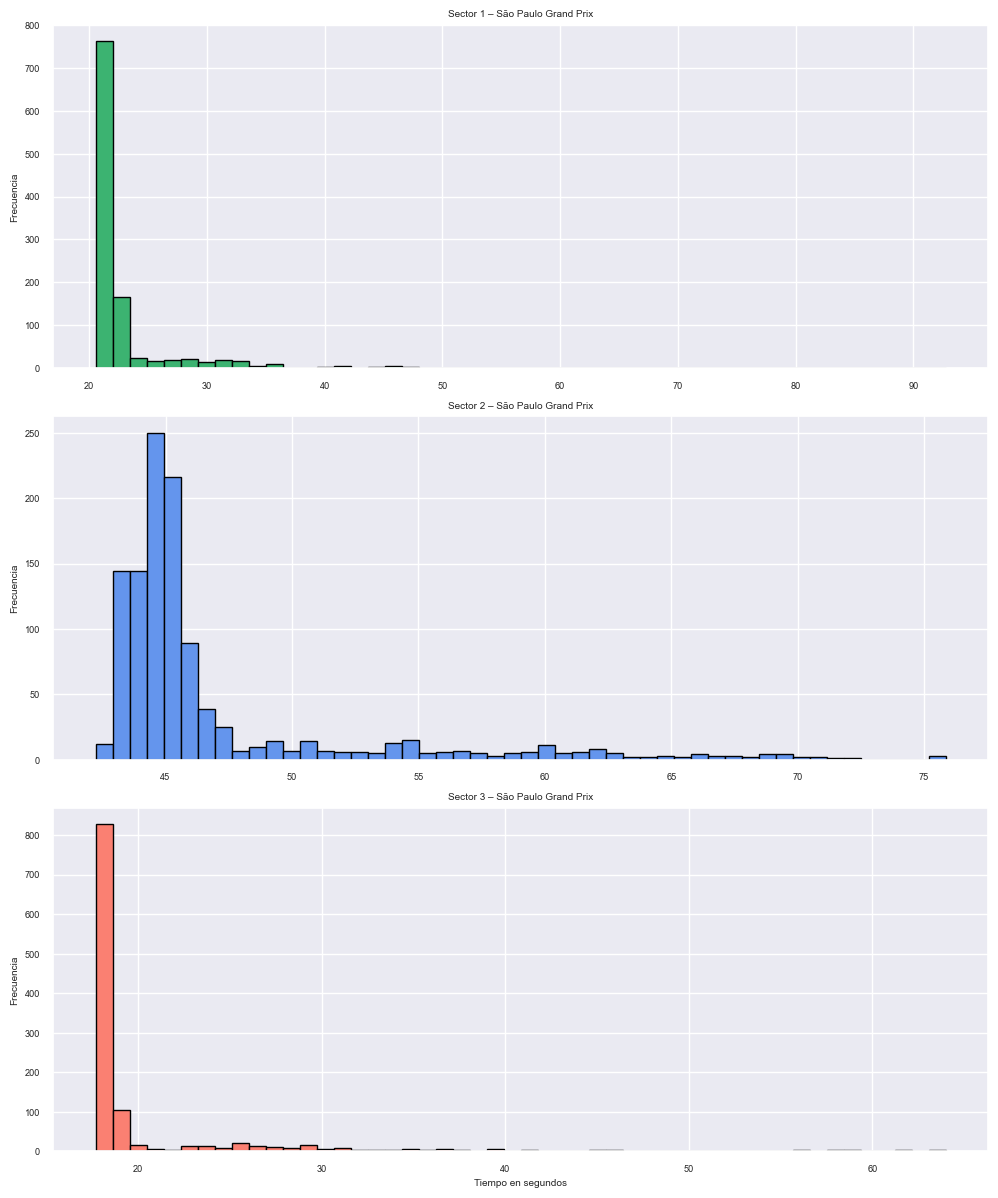

In [948]:
# Filtrar el DataFrame por EventName
saopaulo_df = carreras_24[carreras_24['EventName'] == 'São Paulo Grand Prix']

# Convertir tiempos a segundos y eliminar NaNs
sector1_seconds = saopaulo_df['Sector1Time'].dropna()
sector2_seconds = saopaulo_df['Sector2Time'].dropna()
sector3_seconds = saopaulo_df['Sector3Time'].dropna()

fig, axs = plt.subplots(3, 1, figsize=(10, 12), sharex=False)

# Sector 1
axs[0].hist(sector1_seconds, bins=50, color='mediumseagreen', edgecolor='black')
axs[0].set_title('Sector 1 – São Paulo Grand Prix')
axs[0].set_ylabel('Frecuencia')
axs[0].grid(True)

# Sector 2
axs[1].hist(sector2_seconds, bins=50, color='cornflowerblue', edgecolor='black')
axs[1].set_title('Sector 2 – São Paulo Grand Prix')
axs[1].set_ylabel('Frecuencia')
axs[1].grid(True)

# Sector 3
axs[2].hist(sector3_seconds, bins=50, color='salmon', edgecolor='black')
axs[2].set_title('Sector 3 – São Paulo Grand Prix')
axs[2].set_xlabel('Tiempo en segundos')
axs[2].set_ylabel('Frecuencia')
axs[2].grid(True)

# Ajustar espacios
plt.tight_layout()
plt.show()


In [949]:
sector1_seconds.describe()

count    1098.000000
mean       23.134933
std         4.982124
min        20.546000
25%        21.341250
50%        21.617000
75%        22.176500
max        92.763000
Name: Sector1Time, dtype: float64

In [950]:
sector2_seconds.describe()

count    1133.000000
mean       47.007008
std         5.710202
min        42.236000
25%        44.165000
50%        44.958000
75%        46.237000
max        75.860000
Name: Sector2Time, dtype: float64

In [951]:
sector3_seconds.describe()

count    1133.000000
mean       20.487071
std         6.487737
min        17.690000
25%        18.116000
50%        18.316000
75%        18.697000
max        64.005000
Name: Sector3Time, dtype: float64

In [952]:
# En los sectores 1 y 3 los datos están bastante concentrados, y tiene sentido imputar la mediana de ese valor en la misma carrera.
# En el sector 2 solo hay 3 nulos. No es tan relevante ni va a tener un impacto importante imputar también estos 3 con la mediana.

# Imputar Sector1Time, Sector2Time y Sector3Time por la mediana del mismo EventName
for sector in ['Sector1Time', 'Sector2Time', 'Sector3Time']:
    carreras_24[sector] = carreras_24[sector].fillna(
        carreras_24.groupby('EventName',observed=True)[sector].transform('median')
    )


In [953]:
# Vuelvo a aplicar la imputación en la columna LapTime para tratar los últimos faltantes.
carreras_24['LapTime'] = carreras_24.apply(imputar_laptime_con_sectores, axis=1)

In [954]:
carreras_24.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26577 entries, 0 to 26576
Data columns (total 39 columns):
 #   Column            Non-Null Count  Dtype          
---  ------            --------------  -----          
 0   EventName         26577 non-null  category       
 1   EventDate         26577 non-null  datetime64[ns] 
 2   Driver            26577 non-null  category       
 3   DriverNumber      26577 non-null  int64          
 4   Team              26577 non-null  category       
 5   PitInTime         849 non-null    timedelta64[ns]
 6   PitOutTime        840 non-null    timedelta64[ns]
 7   IsPersonalBest    26577 non-null  category       
 8   Stint             26577 non-null  float64        
 9   LapTime           26577 non-null  float64        
 10  LapNumber         26577 non-null  int64          
 11  LapStartTime      26577 non-null  float64        
 12  LapStartDate      26577 non-null  datetime64[ns] 
 13  Sector1Time       26577 non-null  float64        
 14  Sector

#### Análisis de la variable Position

In [955]:
carreras_24.isna().sum()

EventName               0
EventDate               0
Driver                  0
DriverNumber            0
Team                    0
PitInTime           25728
PitOutTime          25737
IsPersonalBest          0
Stint                   0
LapTime                 0
LapNumber               0
LapStartTime            0
LapStartDate            0
Sector1Time             0
Sector2Time             0
Sector3Time             0
SpeedI1              4117
SpeedI2                25
SpeedFL               849
SpeedST              2155
AirTemp                 0
TrackTemp               0
Humidity                0
Compound                0
TyreLife                0
FreshTyre               0
TrackStatus             0
Position                0
Deleted                 0
DeletedReason           0
FastF1Generated         0
IsAccurate              0
PitOutTime2         25753
PitTime             25753
PitTime_seconds         0
Pit                     0
LapNumber_driver        0
DNF                     0
Likely_DNF  

---
### Algunas visualizaciones básicas

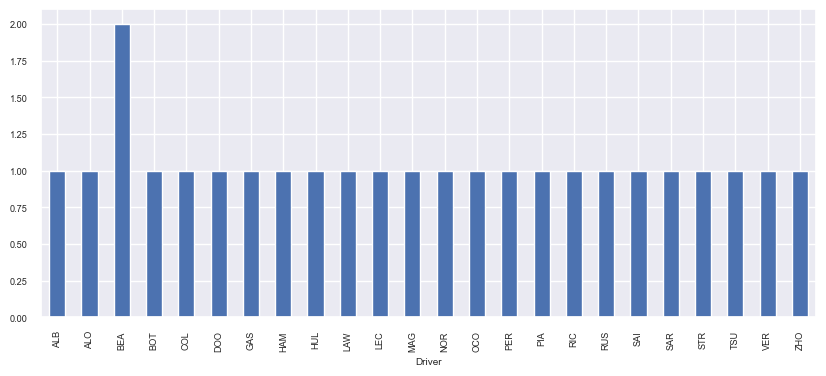

In [956]:
# ¿En cuántos equipos estuvo cada piloto?
teams = carreras_24.groupby('Driver', observed=True)['Team'].nunique().reset_index()
teams.plot(kind='bar', x='Driver', y='Team', figsize=(10, 4), legend=False)
plt.show()

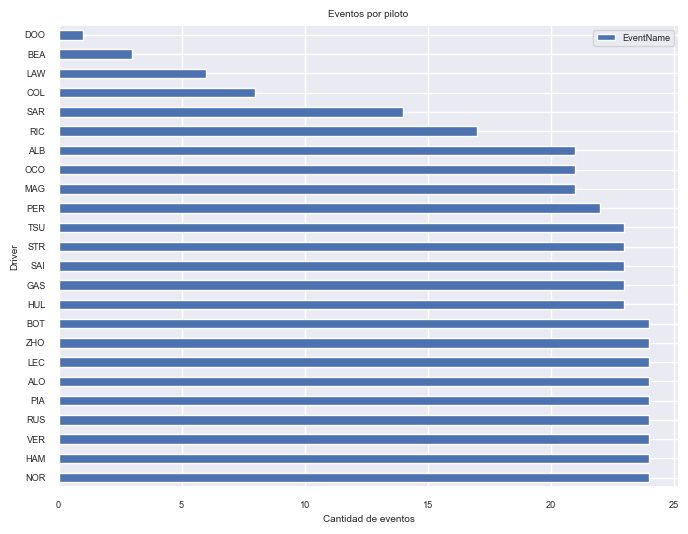

In [957]:
# Total de carreras en las que participó cada piloto
driver_events = carreras_24.groupby('Driver', observed=True)['EventName'].nunique().reset_index()
driver_events = driver_events.sort_values(ascending=False, by='EventName')

driver_events.plot.barh(x='Driver', y='EventName', figsize=(8, 6))
plt.xlabel('Cantidad de eventos')
plt.title('Eventos por piloto')
plt.show()


In [958]:
#!conda install networkx

In [959]:
# Para cuántos equipos corre cada piloto?
import networkx as nx
from networkx.drawing.layout import bipartite_layout

# Crear grafo
G = nx.Graph()
pares = carreras_24[['Driver', 'Team']].drop_duplicates()
pilotos = pares['Driver'].unique()
equipos = pares['Team'].unique()

G.add_nodes_from(pilotos, bipartite=0)
G.add_nodes_from(equipos, bipartite=1)
G.add_edges_from(list(pares.itertuples(index=False, name=None)))

# Layout bipartito
pos = bipartite_layout(G, drivers)

# Figura
plt.figure(figsize=(10, 6))
nx.draw(G, pos,
        with_labels=True,
        node_size=2000,
        node_color=['#66c2a5' if n in drivers else '#fc8d62' for n in G.nodes()],
        edge_color='gray',
        font_size=8)

plt.title('Relación entre pilotos y equipos')
plt.axis('off')
plt.show()

ModuleNotFoundError: No module named 'networkx'

### Datos por piloto y carrera

- Posición en cada carrera
- Total de tiempo de vuelta
- Compuesto de neumáticos usados
- Número de paradas y tiempo total de pits

In [ ]:
# Métricas por piloto y por carrera
result = carreras_24.groupby(['Driver', 'EventName'], observed=True).agg(
    Position_start=('Position', 'first'),
    Position_end=('Position', 'last'),
    Total_LapTime=('LapTime', 'sum'),
    Tyre_Compound_start=('Compound', 'first'),
    Tyre_Compound_end=('Compound', 'last'),
    Total_PitTime=('PitTime_seconds', 'sum'), # Total de tiempo en boxes
    Pit_Stops=('PitInTime', lambda x: x.notna().sum()),
).reset_index()

# Info de las entradas a boxes
pit_laps = (
    carreras_24[carreras_24['PitInTime'].notna()]
    .groupby(['Driver', 'EventName'], observed=True)['LapNumber']
    .apply(list)
    .reset_index()
    .rename(columns={'LapNumber': 'Pit_LapNumbers'})
)
result = result.merge(pit_laps, on=['Driver', 'EventName'], how='left')
result['Pit_LapNumbers'] = result['Pit_LapNumbers'].apply(lambda x: x if isinstance(x, list) else [])

result.head()

,Driver,EventName,Position_start,Position_end,Total_LapTime,Tyre_Compound_start,Tyre_Compound_end,Total_PitTime,Pit_Stops,Pit_LapNumbers
0,ALB,Abu Dhabi Grand Prix,16.0,11.0,5204.542,MEDIUM,HARD,22.054,1,[12]
1,ALB,Australian Grand Prix,14.0,11.0,4831.852,MEDIUM,HARD,35.187,2,"[6, 27]"
2,ALB,Austrian Grand Prix,15.0,14.0,5073.664,MEDIUM,HARD,43.397,2,"[12, 39]"
3,ALB,Azerbaijan Grand Prix,9.0,7.0,5665.403,HARD,MEDIUM,20.333,1,[31]
4,ALB,Bahrain Grand Prix,11.0,15.0,5516.628,SOFT,HARD,49.461,2,"[15, 36]"


### Otros datos y métricas de interés

- winners: ganadores de cada carrera
- ranking: cantidad de carreras ganadas por piloto
- ranking_top: el top 3 de pilotos ganadores
- df_top: todas las carreras de los pilotos del top 3
- ganadas: todas las carreras ganadas por los pilotos del top 3

In [ ]:
# Ganadores de cada carrera
winners = result[['Driver', 'EventName']][result['Position_end']==1].sort_values(['Driver', 'EventName'])

In [ ]:
# Top 3 ganadores
ranking = winners['Driver'].value_counts().reset_index()
ranking.columns = ['Driver', 'Wins']
# ranking = ranking.sort_values(by='Wins', ascending=False) # no es necesario, el value_counts() por defecto devuelve los datos ordenados.

ranking_top = ranking.head(3)
ranking_top

,Driver,Wins
0,VER,9
1,NOR,4
2,LEC,3


In [ ]:
# Me quedo solo con las carreras de los 3 pilotos que más carreras ganaron
df_top = result[result['Driver'].isin(ranking_top['Driver'])]
df_top.head()

,Driver,EventName,Position_start,Position_end,Total_LapTime,Tyre_Compound_start,Tyre_Compound_end,Total_PitTime,Pit_Stops,Pit_LapNumbers
157,LEC,Abu Dhabi Grand Prix,9.0,3.0,5225.219,MEDIUM,HARD,21.933,1,[20]
158,LEC,Australian Grand Prix,4.0,2.0,4829.209,MEDIUM,HARD,34.387,2,"[9, 34]"
159,LEC,Austrian Grand Prix,18.0,11.0,5129.854,MEDIUM,MEDIUM,96.589,4,"[1, 16, 33, 51]"
160,LEC,Azerbaijan Grand Prix,1.0,2.0,5588.917,MEDIUM,HARD,20.867,1,[16]
161,LEC,Bahrain Grand Prix,2.0,4.0,5544.411,SOFT,HARD,48.129,2,"[11, 34]"


In [ ]:
# Del top 3, solo las carreras donde cada piloto ganó

ganadas = df_top[df_top['Position_end'] == 1].copy()

ganadas['RacingTime'] = ganadas['Total_LapTime'] - ganadas['Total_PitTime']
ganadas['PitFraction'] = ganadas['Total_PitTime'] / ganadas['Total_LapTime']
ganadas['Position_Change'] = ganadas['Position_start'] - ganadas['Position_end']
ganadas['Compound_Strategy'] = ganadas['Tyre_Compound_start'].astype(str) + ' → ' + ganadas['Tyre_Compound_end'].astype(str)

ganadas['Driver'] = ganadas['Driver'].cat.remove_unused_categories()

ganadas.head()

,Driver,EventName,Position_start,Position_end,Total_LapTime,Tyre_Compound_start,Tyre_Compound_end,Total_PitTime,Pit_Stops,Pit_LapNumbers,RacingTime,PitFraction,Position_Change,Compound_Strategy
169,LEC,Italian Grand Prix,2.0,1.0,4480.727,MEDIUM,HARD,24.419,1,[15],4456.308,0.005450,1.0,MEDIUM → HARD
174,LEC,Monaco Grand Prix,1.0,1.0,8507.572,MEDIUM,HARD,2357.749,1,[1],6149.823,0.277135,0.0,MEDIUM → HARD
180,LEC,United States Grand Prix,1.0,1.0,5709.639,MEDIUM,HARD,23.870,1,[26],5685.769,0.004181,0.0,MEDIUM → HARD
202,NOR,Abu Dhabi Grand Prix,1.0,1.0,5193.291,MEDIUM,HARD,21.406,1,[26],5171.885,0.004122,0.0,MEDIUM → HARD
211,NOR,Dutch Grand Prix,2.0,1.0,5445.519,MEDIUM,HARD,21.520,1,[28],5423.999,0.003952,1.0,MEDIUM → HARD


### Más visualizaciones

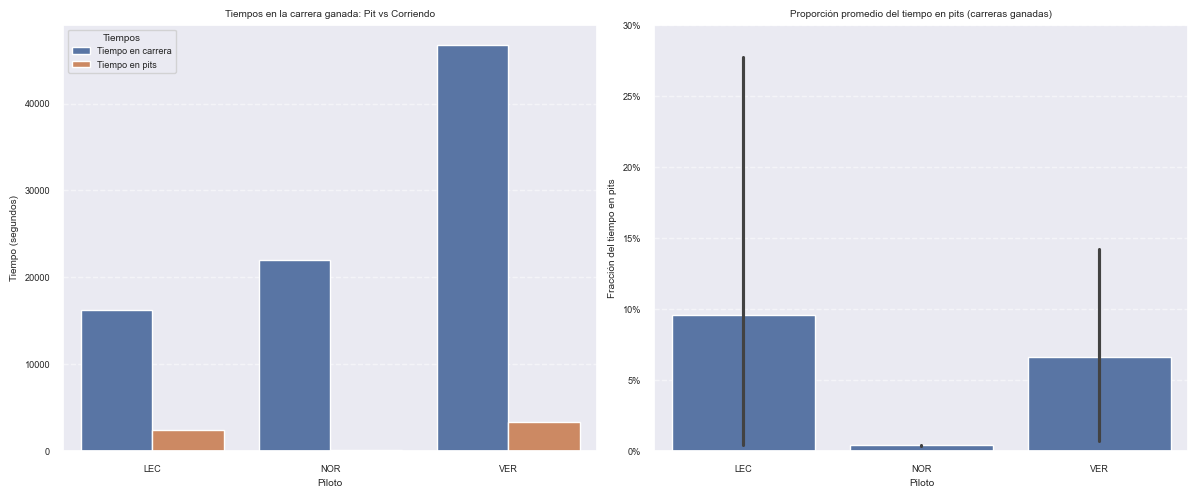

In [ ]:
# Preparamos los datos
comparacion = ganadas.melt(
    id_vars=['Driver', 'EventName', 'Pit_Stops'],
    value_vars=['RacingTime', 'Total_PitTime'],
    var_name='Tipo',
    value_name='Tiempo'
)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 fila, 2 columnas

# Primer gráfico: Barras de tiempo total
sns.barplot(data=comparacion, errorbar=None, estimator='sum', x='Driver', y='Tiempo', hue='Tipo', ax=axes[0])
axes[0].set_title('Tiempos en la carrera ganada: Pit vs Corriendo')
axes[0].set_ylabel('Tiempo (segundos)')
axes[0].set_xlabel('Piloto')
axes[0].legend(title='Tiempos', labels=['Tiempo en carrera', 'Tiempo en pits'])
axes[0].grid(axis='y', linestyle='--', alpha=0.5)

# Segundo gráfico: Fracción de tiempo en boxes
sns.barplot(data=ganadas, x='Driver', y='PitFraction', estimator='mean', ax=axes[1])
axes[1].set_title('Proporción promedio del tiempo en pits (carreras ganadas)')
axes[1].set_ylabel('Fracción del tiempo en boxes')
axes[1].set_xlabel('Piloto')
axes[1].set_ylim(0, 0.3)
axes[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))
axes[1].grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


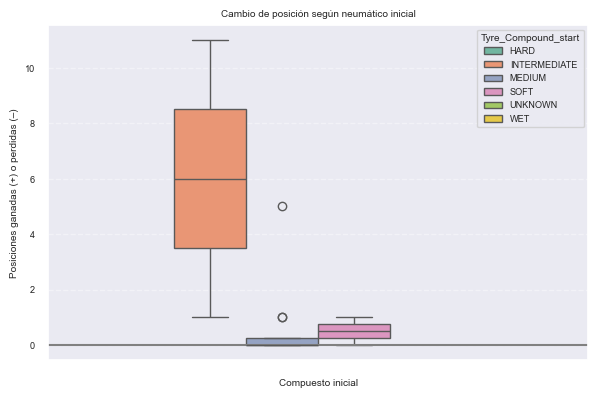

In [ ]:
ganadas['Position_Change'] = ganadas['Position_start'] - ganadas['Position_end']

plt.figure(figsize=(6, 4))
sns.boxplot(
    data=ganadas,
    hue='Tyre_Compound_start',
    y='Position_Change',
    palette='Set2'
)
plt.axhline(0, linestyle='-', color='gray')
plt.title('Cambio de posición según neumático inicial')
plt.ylabel('Posiciones ganadas (+) o perdidas (–)')
plt.xlabel('Compuesto inicial')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()


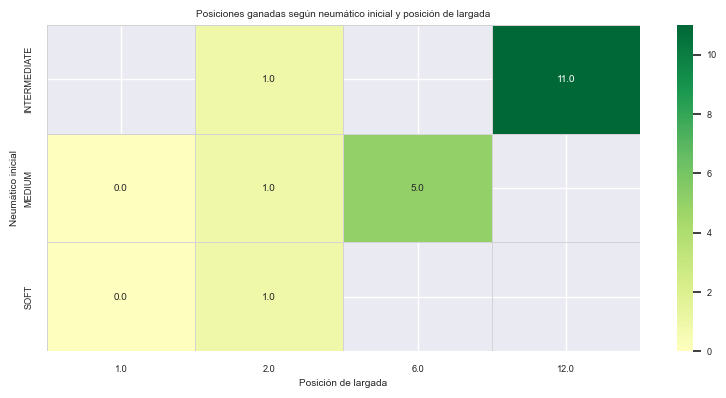

In [ ]:
# Pivot con posición de largada
pivot = ganadas.pivot_table(
    index='Tyre_Compound_start',
    columns='Position_start',
    values='Position_Change',
    aggfunc='mean',
    observed=False
)

# Heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(pivot, annot=True, fmt=".1f", cmap="RdYlGn", center=0, linewidths=0.5, linecolor='lightgray')

plt.title("Posiciones ganadas según neumático inicial y posición de largada")
plt.xlabel("Posición de largada")
plt.ylabel("Neumático inicial")
plt.tight_layout()
plt.show()


---
### Exportación para leer en otra Notebook

In [ ]:
import json

# Detectar columnas categóricas
categorical_cols = [col for col, dtype in carreras_24.dtypes.items() if str(dtype) == 'category']

# Guardar los tipos como strings
dtypes_str = {col: str(dtype) for col, dtype in carreras_24.dtypes.items()}

# Guardar todo en un solo JSON
info = {
    "dtypes": dtypes_str,
    "categoricals": categorical_cols
}

with open("../datasets/carreras_24_dtypes.json", "w") as f:
    json.dump(info, f)

# exportar CSV
carreras_24.to_csv('../datasets/carreras_24.csv', index=False)
